<a href="https://colab.research.google.com/github/mkshowhardo/Google-colab/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv', header = None, usecols= [0,1,2])

In [3]:
df.columns = ['class label', 'alcohol', 'malic acid']

In [4]:
df

,class label,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

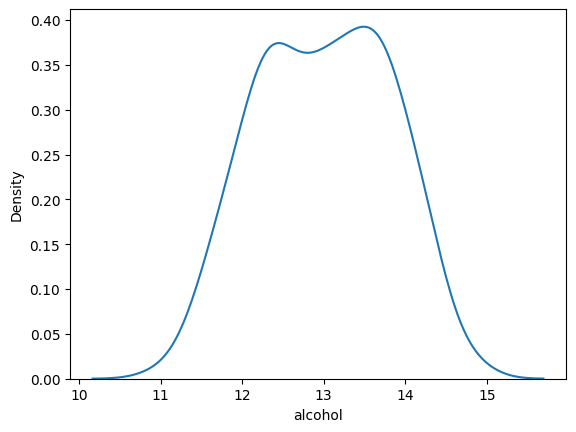

In [5]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

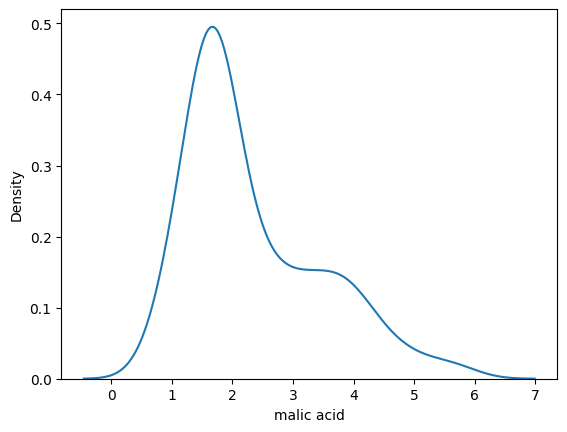

In [6]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohol', ylabel='malic acid'>

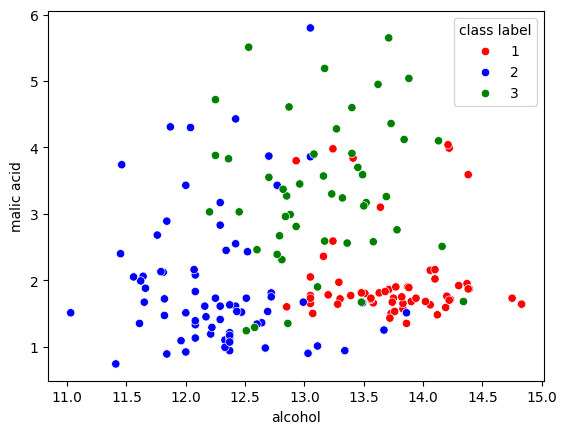

In [19]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot( x = df['alcohol'], y = df['malic acid'],hue=df['class label'],palette=color_dict)


In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('class label', axis = 1),df['class label'],test_size = 0.3, random_state = 0)

In [24]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
x_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [28]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [29]:
x_train_scaled

,alcohol,malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [30]:
np.round(x_train.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [31]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


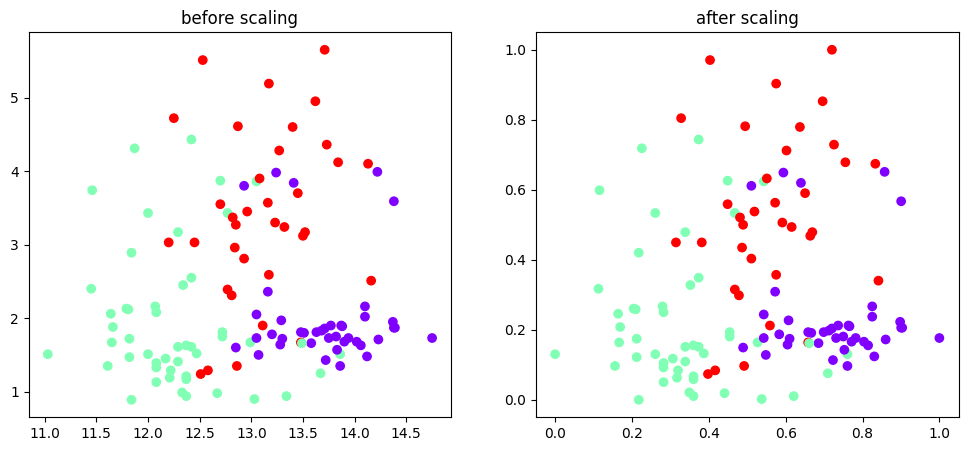

In [38]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize= (12,5))

ax1.scatter(x_train['alcohol'],x_train['malic acid'], c = y_train, cmap = 'rainbow')
ax1.set_title('before scaling')
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic acid'], c = y_train, cmap ='rainbow')
ax2.set_title('after scaling')
plt.show()

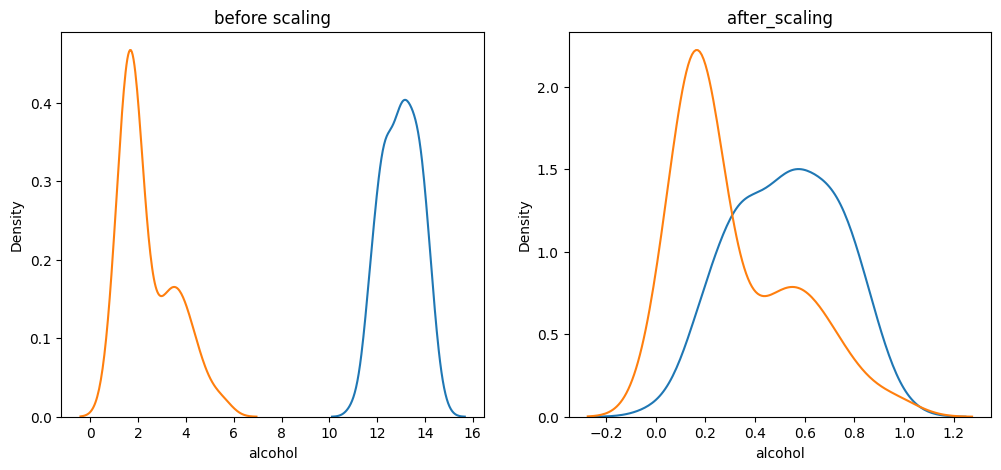

In [40]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize= (12,5))

ax1.set_title('before scaling')
sns.kdeplot(x_train['alcohol'],ax = ax1)
sns.kdeplot(x_train['malic acid'],ax = ax1)

ax2.set_title('after_scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax = ax2)
sns.kdeplot(x_train_scaled['malic acid'], ax= ax2)

plt.show()


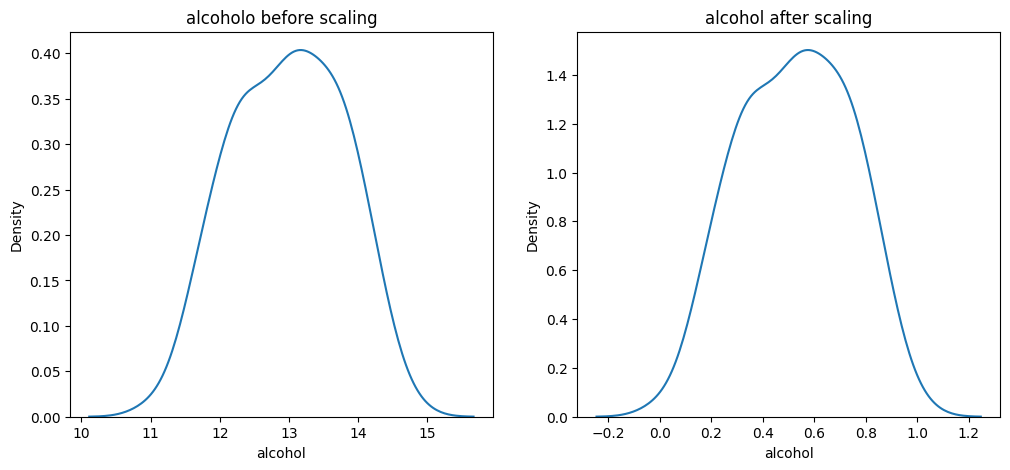

In [41]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize= (12,5))


ax1.set_title('alcoholo before scaling')
sns.kdeplot(x_train['alcohol'], ax = ax1)

ax2.set_title('alcohol after scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax= ax2)

plt.show()

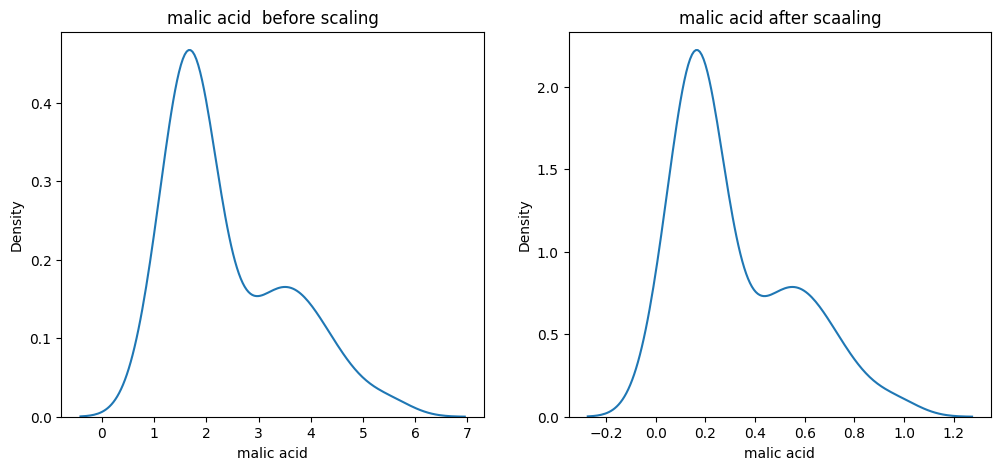

In [42]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize= (12,5))


ax1.set_title('malic acid  before scaling')
sns.kdeplot(x_train['malic acid'], ax = ax1)

ax2.set_title('malic acid after scaaling')
sns.kdeplot(x_train_scaled['malic acid'], ax = ax2)

plt.show()